In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',100)

# Batting Data
___

In [46]:
df = pd.read_csv('/Users/ryand/Downloads/2016 Batting/merged.csv')

/Users/ryand/pyprojects/pyproj-venv3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (2,14,27,28,29,30,50,51,53,54,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
s_value ={'double':.8,
 'double_play':0,
 'field_error':.46,
 'field_out':0,
 'fielders_choice':.46,
 'fielders_choice_out':0,
 'force_out':0,
 'grounded_into_double_play':0,
 'home_run':1.4,
 'sac_bunt':.46,
 'sac_bunt_double_play':0,
 'sac_fly':.46,
 'sac_fly_double_play':0,
 'single':.46,
 'triple':1.02,
 'triple_play':0}
df['s_value'] = df['events'].map(lambda x: s_value[x])

In [48]:
df = df[df['events'].isin(['double','single','triple','home_run','double_play',
                           'force_out','grounded_into_double_play','field_out'])]
df = df.dropna(subset=['launch_speed','launch_angle','s_value'])
df = df[df['launch_speed'] != 'null']
df = df[df['launch_angle'] != 'null']
# df = df[df['s_value'] != 'null']

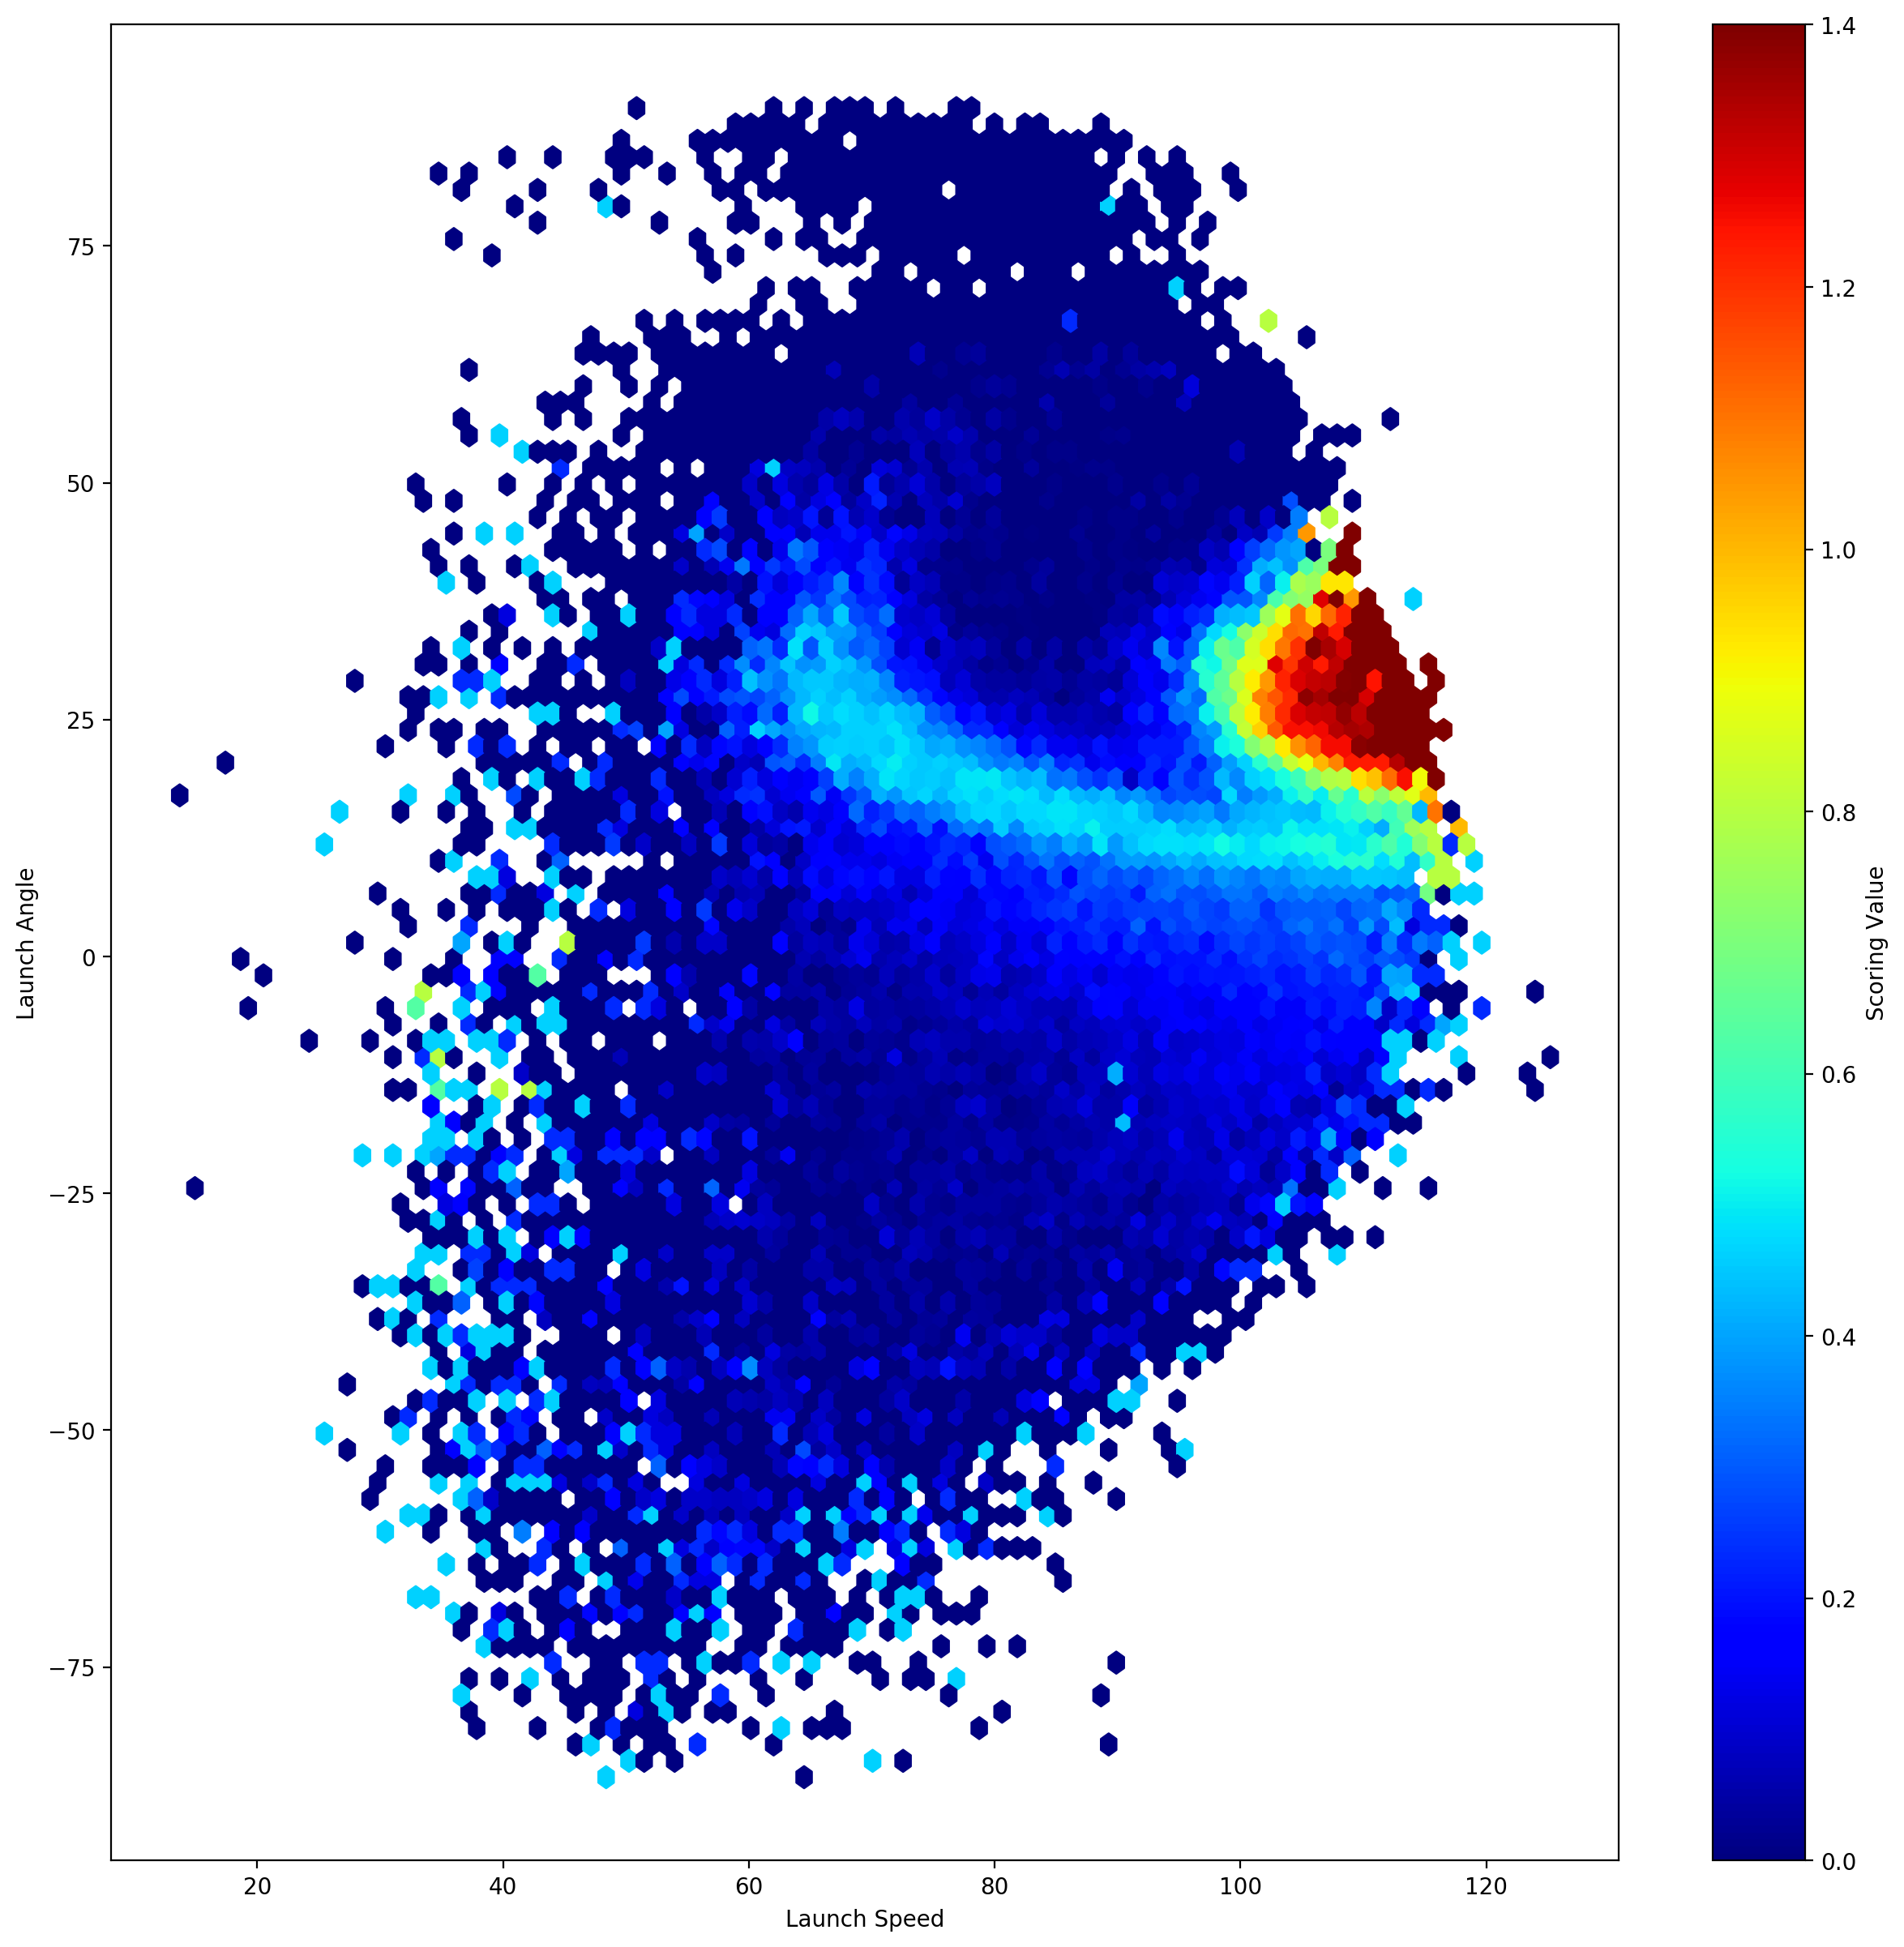

In [50]:
x = df['launch_speed']
y = df['launch_angle']
color = df['s_value']

fig = plt.figure(figsize=(15,15), dpi=200)
ax1 = fig.add_subplot(111)
hb = ax1.hexbin(x, y, gridsize=90, C=color, cmap=plt.get_cmap('jet'))
cb = fig.colorbar(hb, ax=ax1)
cb.set_label('Scoring Value')
ax1.set_xlabel('Launch Speed')
ax1.set_ylabel('Launch Angle')

# Pitching Data
___

In [25]:
df = pd.read_csv('/Users/ryand/Downloads/Pitching Data.csv')
df = df[df['events'] != 'null']

In [26]:
s_value ={'catcher_interf':0,
 'caught_stealing_2b':-.6,
 'caught_stealing_3b':-.6,
 'double':.8,
 'double_play':-1,
 'field_error':.46,
 'field_out':-1,
 'fielders_choice':.46,
 'fielders_choice_out':.46,
 'force_out':-.6,
 'grounded_into_double_play':-1,
 'hit_by_pitch':.46,
 'home_run':1.4,
 'pickoff_2b':-.6,
 'pickoff_caught_stealing_2b':-.6,
 'sac_bunt':.46,
 'sac_fly':.46,
 'single':.46,
 'strikeout':-.6,
 'strikeout_double_play':-1,
 'triple':1.02,
 'walk':.33}
df['s_value'] = df['events'].map(lambda x: s_value[x])

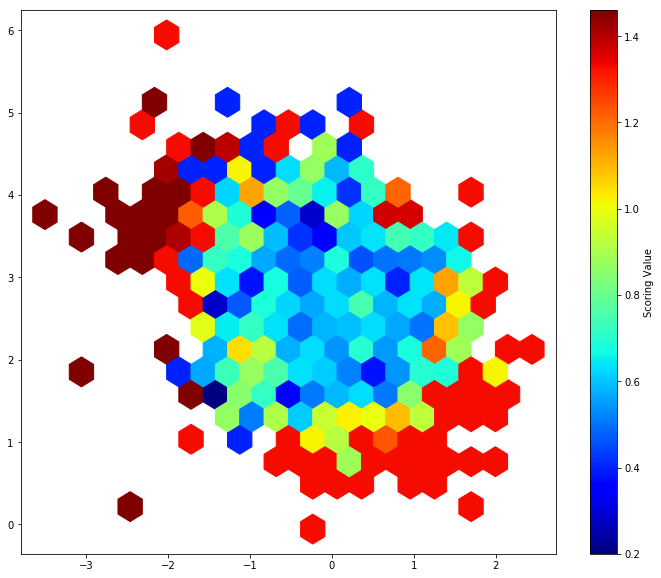

In [42]:
x_var = 'plate_x'
y_var = 'plate_z'

batter = 'R'
pitcher = 'R'

df_ = df[df['stand'] == batter]
df_ = df_[df_['p_throws'] == pitcher]

df_ = df_[df_[x_var] != 'null']
df_ = df_[df_[y_var] != 'null']
df_ = df_.dropna(subset=[y_var,x_var,'events'])


x = df_[x_var].astype(float)
y = df_[y_var].astype(float)
color = df_['s_value'].astype(float) +1

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)
hb = ax1.hexbin(x, y, gridsize=20, C=color, cmap=plt.get_cmap('jet'))
cb = fig.colorbar(hb, ax=ax1)
cb.set_label('Scoring Value')